In [10]:
import scipy as sp
import scipy.io as io
from scipy.linalg import inv
import pdb
import pylab as pl
import numpy as np



In [2]:
sp.cov(4*np.array([[1,-1],[1,0],[3,0],[3,1]]).T, bias = 1)
x = np.array([1,-1,-1,1])
y = np.array([1,-1,0,0])
np.cov(x,y, bias=1)


array([[ 1. ,  0.5],
       [ 0.5,  0.5]])

In [5]:
np.linalg.uniques(np.ones(3))

AttributeError: module 'scipy.linalg' has no attribute 'uniques'

In [49]:
a = np.ones(6)
b = np.array([0,2,0,2,0,2])
a -= b 
a[b==0]

array([ 1.,  1.,  1.])

In [ ]:
def train_lda_brut(X,Y):
    w_p = X[Y==1].mean(axis=0)
    w_m = X[Y==-1].mean(axis=0)
    n = len(w_p)
    S_b = (w_p - w_m).reshape(n,1).dot((w_p - w_m).reshape(n,1))

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:

def train_lda(X,Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    # your code here 
    # hint: use the scipy/numpy function sp.cov
    w_p = X.T[Y==1].mean(axis=0)
    w_m = X.T[Y==-1].mean(axis=0)
    n = len(w_p)
    S_B = (w_p - w_m).reshape(n,1).dot((w_p - w_m).reshape(1,n))
    S_W = np.cov(X.T[Y==1], rowvar = False, bias = 1)
    S_W += np.cov(X.T[Y==-1], rowvar = False, bias = 1)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    #for i in range(len(eig_vals)):
    #    eigvec_sc = eig_vecs[:,i].reshape(4,1) 
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    return np.dot(np.linalg.inv(S_W), (w_p - w_m)), 0
    #clf = LinearDiscriminantAnalysis()
    #clf.fit(X.T, Y)
    #print(type(clf.get_params()))
    #return clf.get_params(), 0

    
#    W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
#    return W, 0

###########################################
('Accuracy sklearn LDA:', 0.82199999999999995)
###########################################


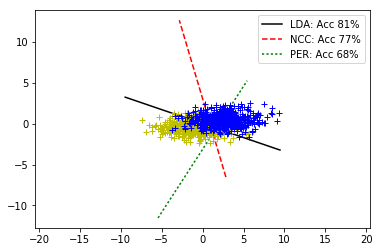

In [17]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
compare_classifiers_toy()


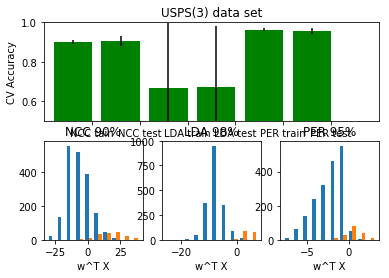

In [18]:
compare_classifiers()

In [2]:

def load_usps_data(fname, digit=3):
    ''' Loads USPS (United State Postal Service) data from <fname> 
    Definition:  X, Y = load_usps_data(fname, digit = 3)
    Input:       fname   - string
                 digit   - optional, integer between 0 and 9, default is 3
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels
                             (1 - picture displays <digit>, -1 - otherwise)                           
    '''
    # load the data
    data = io.loadmat(fname)
    # extract images and labels
    X = data['data_patterns']
    Y = data['data_labels']
    Y = Y[digit,:]
    return X, Y
    


In [3]:

def load_bci_data(fname):
    ''' Loads BCI data (one subject, copy-spelling experiment) from <fname> 
    Definition:  X, Y = load_bci_data(fname)
    Input:       fname   - string
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels 
                            (1- target, -1 - non-target)                         
    '''
    # load the data
    data = io.loadmat(fname)
    # extract time-electrode features and labels
    X = data['X']
    Y = data['Y']
    # collapse the time-electrode dimensions
    X = sp.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
    # transform the labels to (-1,1)
    Y = sp.sign((Y[0,:]>0) -.5)
    return X,Y

In [4]:
def train_perceptron(X,Y,iterations=200,eta=.1):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
    '''
    #include the bias term by adding a row of ones to X 
    X = sp.concatenate((sp.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = sp.ones((X.shape[0]))/X.shape[0]
    for it in sp.arange(iterations):
        # indices of misclassified data
        wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            m = wrong[sp.random.random_integers(0, wrong.shape[0]-1)]
            #update weight vector (use variable learning rate (eta/(1.+it)) )
            weights = weights  + (eta/(1.+it)) * X[:, m] * Y[m]; 
            # compute accuracy
            wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
    b = -weights[0] 
    w = weights[1:]
    return w,b



In [5]:
def train_ncc(X,Y):
    ''' Trains a nearest centroid classifier
    Definition:  w, b   = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    #class means
    mupos = sp.mean(X[:,Y>0],axis=1)
    muneg = sp.mean(X[:,Y<0],axis=1)
    #weight vector and bias term
    w = mupos - muneg
    b = (w.dot(mupos) + w.dot(muneg))/2.
    return w,b
    	


In [6]:
def plot_histogram(X, Y, w, b, cname):
    ''' Plots a histogram of classifier outputs (w^T X) for each class 
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification  
                    cname   - name of the classifier 
    '''
    pl.hist((w.dot(X[:,Y<0]), w.dot(X[:,Y>0])))
    pl.xlabel("w^T X")
    pl.title(cname + ' ' + str(100*sp.sum(sp.sign(w.dot(X)-b)==Y)/X.shape[1]) + "%")   
     



In [7]:
def compare_classifiers_toy():
    '''
    Compares 3 different linear classifiers (Nearest-Centroid, Linear Discriminant Analysis, 
    Perceptron) on 2 dimensional toy data
    '''
    #generate 2D data
    N =500
    cov = sp.array([[5, 0], [0, 0.5]])
    x1 = sp.random.multivariate_normal([-0.5, -0.5], cov, N) 
    x2 = sp.random.multivariate_normal([2.5, 0.5], cov, N) 
    X = sp.vstack((x1, x2)).transpose()
    Y = sp.hstack((sp.ones((N)), -1*sp.ones((N))))
    	
    clf = LinearDiscriminantAnalysis()
    clf.fit(X.T, Y)
    print('###########################################')
    print('Accuracy sklearn LDA:', clf.score(X.T,Y))
    print('###########################################')
    #train NCC, LDA and Perceptron
    w_ncc,b_ncc = train_ncc(X,Y)
    w_lda,b_lda = train_lda(X,Y)
    w_per,b_per = train_perceptron(X,Y)
    	    
    #plot result
    pl.figure()
    b_ncc = 10*b_ncc / sp.linalg.norm(w_ncc)
    b_lda = 10*b_lda / sp.linalg.norm(w_lda)
    b_per = 10*b_per / sp.linalg.norm(w_per)
    w_lda = 10*w_lda / sp.linalg.norm(w_lda)
    w_ncc = 10*w_ncc / sp.linalg.norm(w_ncc)
    w_per = 10*w_per / sp.linalg.norm(w_per)
    pl.plot([-w_lda[1], w_lda[1]], [w_lda[0]+b_lda/w_lda[1], -w_lda[0]+b_lda/w_lda[1]], 
        color = 'k', label='LDA: Acc ' + str(100*sp.sum(sp.sign(w_lda.dot(X)-b_lda)==Y)/X.shape[1]) + "%")
    pl.hold(True)
    pl.plot([-w_ncc[1], w_ncc[1]], [w_ncc[0]+b_ncc/w_ncc[1], -w_ncc[0]+b_ncc/w_ncc[1]], 
        color = 'r', linestyle = '--', label='NCC: Acc ' + str(100*sp.sum(sp.sign(w_ncc.dot(X)-b_ncc)==Y)/X.shape[1]) + "%")
    pl.plot([-w_per[1], w_per[1]], [w_per[0]+b_per/w_per[1], -w_per[0]+b_per/w_per[1]], 
        color = 'g', linestyle = ':', label='PER: Acc ' + str(100*sp.sum(sp.sign(w_per.dot(X)-b_per)==Y)/X.shape[1]) + "%")
    pl.plot(x1[:,0], x1[:,1], 'y+')
    pl.plot(x2[:,0], x2[:,1], 'b+')
    pl.axis('equal')	
    pl.legend(loc=1)
		

In [27]:
def compare_classifiers(usps = True, digit = 3):
    '''
    Compares 3 different linear classifiers (Nearest-Centroid, Linear Discriminant Analysis, 
    Perceptron) on either USPS data (for usps=True) or on BCI data (for usps = False)
    '''
    if usps: #load usps data set
        X,Y = load_usps_data('usps.mat',digit)
        tit = 'USPS(' + str(digit) + ')'
    else: #load bci data set 
        X,Y = load_bci_data('bcidata.mat')
        tit = 'BCI'
    
    #Use crossvalidation to estimate the training and test accuracies
    acc_cv = sp.zeros((5, 6))
    (acc_cv[:,0],acc_cv[:,1]) = crossvalidate(X,Y,trainfun=train_ncc)
    (acc_cv[:,2],acc_cv[:,3]) = crossvalidate(X,Y,trainfun=train_lda)
    (acc_cv[:,4],acc_cv[:,5]) = crossvalidate(X,Y,trainfun=train_perceptron)
        
    #Plot the crossvalidation output
    pl.figure()
    ax1 = pl.subplot2grid((2,3), (0,0), colspan = 3)
    pl.bar(sp.array([1, 2, 3, 4, 5, 6]) - 0.4,  acc_cv.mean(0), width = 0.8,
        yerr =  acc_cv.std(0), ecolor = 'k', color = 'g')
    pl.xticks([1, 2, 3, 4, 5, 6], ['NCC tain', 'NCC test', 'LDA train', 'LDA test', 
        'PER train', 'PER test'])
    pl.xlim([0, 7])
    pl.ylim([0.5, 1])
    pl.ylabel('CV Accuracy')
    pl.title(tit + ' data set')
    pl.tight_layout(pad = 4)
    #Train the classifiers and plot the output histograms
    w_ncc,b_ncc = train_ncc(X,Y)
    w_lda,b_lda = train_lda(X,Y)
    w_per,b_per= train_perceptron(X,Y)
    
    ax2 = pl.subplot2grid((2,3), (1,0))
    plot_histogram(X, Y, w_ncc, b_ncc, 'NCC')
    ax3 = pl.subplot2grid((2,3), (1,1))
    plot_histogram(X, Y, w_lda, b_lda, 'LDA')
    ax4 = pl.subplot2grid((2,3), (1,2))
    plot_histogram(X, Y, w_per, b_per, 'PER')



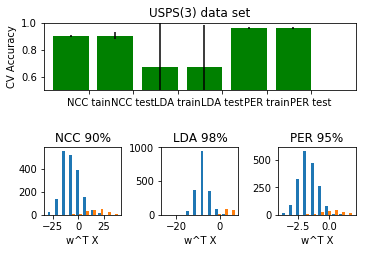

In [28]:
compare_classifiers()

In [9]:
def crossvalidate(X,Y, f=5, trainfun=train_ncc):
	''' 
	Test generalization performance of a linear classifier by crossvalidation
	Definition:     crossvalidate(X,Y, f=5, trainfun=train_ncc)
    Input:      X        -  DxN array of N data points with D features
                Y        -  1D array of length N of class labels
    			f	     - number of cross-validation folds
				trainfun - function for linear classification training
    Output:     acc_train - (f,) array of accuracies in test train folds
                acc_test  - (f,) array of accuracies in each test fold
	'''
	N = f*(X.shape[-1]/f)
	idx = sp.reshape(sp.arange(N),(f,N/f))
	acc_train = sp.zeros((f))
	acc_test = sp.zeros((f))
	
	for ifold in sp.arange(f):
		testidx = sp.zeros((f),dtype=bool)
		testidx[ifold] = 1
		test = idx[testidx,:].flatten()
		train = idx[~testidx,:].flatten()
		w,b = trainfun(X[:,train],Y[train])
		acc_train[ifold] = sp.sum(sp.sign(w.dot(X[:,train])-b)==Y[train])/sp.double(train.shape[0])
		acc_test[ifold] = sp.sum(sp.sign(w.dot(X[:,test])-b)==Y[test])/sp.double(test.shape[0])
	
	return acc_train,acc_test
	
